In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model K-Means Clustering

In [5]:
# Load data stock
adro = pd.read_csv("Stock/ADRO.JK.csv")
bumi = pd.read_csv("Stock/BUMI.JK.csv")
byan = pd.read_csv("Stock/BYAN.JK.csv")
gems = pd.read_csv("Stock/GEMS.JK.csv")
indy = pd.read_csv("Stock/INDY.JK.csv")
itmg = pd.read_csv("Stock/ITMG.JK.csv")
ptba = pd.read_csv("Stock/PTBA.JK.csv")

In [8]:
# Merge data
stocks = pd.concat([adro, bumi, byan, gems, indy, itmg, ptba], keys=["ADRO", "BUMI", "BYAN", "GEMS", "INDY", "ITMG", "PTBA"])
stocks.reset_index(level=0, inplace=True)
stocks.rename(columns={"level_0" : "Code"}, inplace=True)

In [13]:
# Solve Missing Values
stocks = stocks.dropna()

In [14]:
# Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stocks[features]

In [15]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

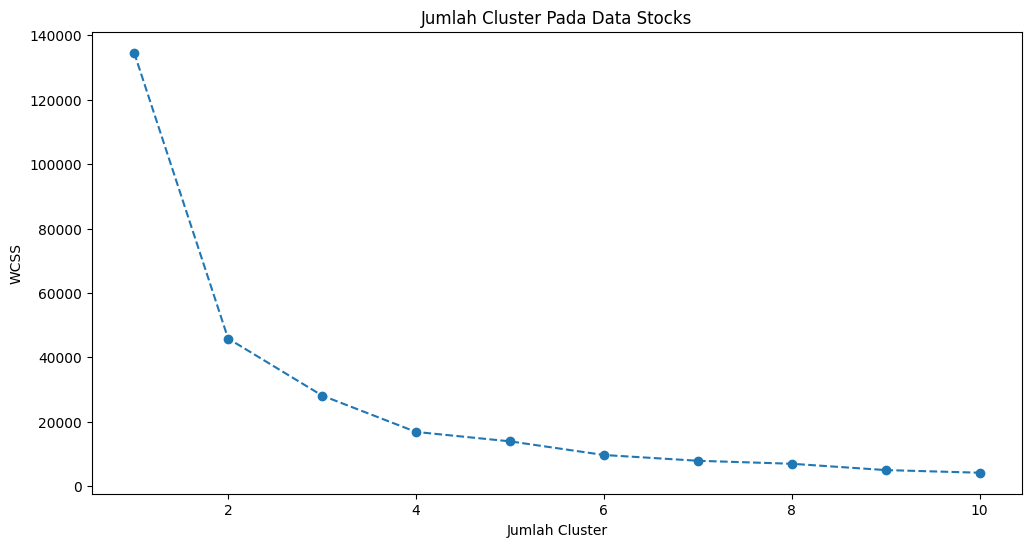

In [16]:
# Cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Visualisasi dengan Elbow
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Jumlah Cluster Pada Data Stocks")
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Bangun Model K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambah Cluster ke Data
stocks['Cluster'] = clusters
stocks

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_5020\3505330611.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['Cluster'] = clusters


,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0
...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0


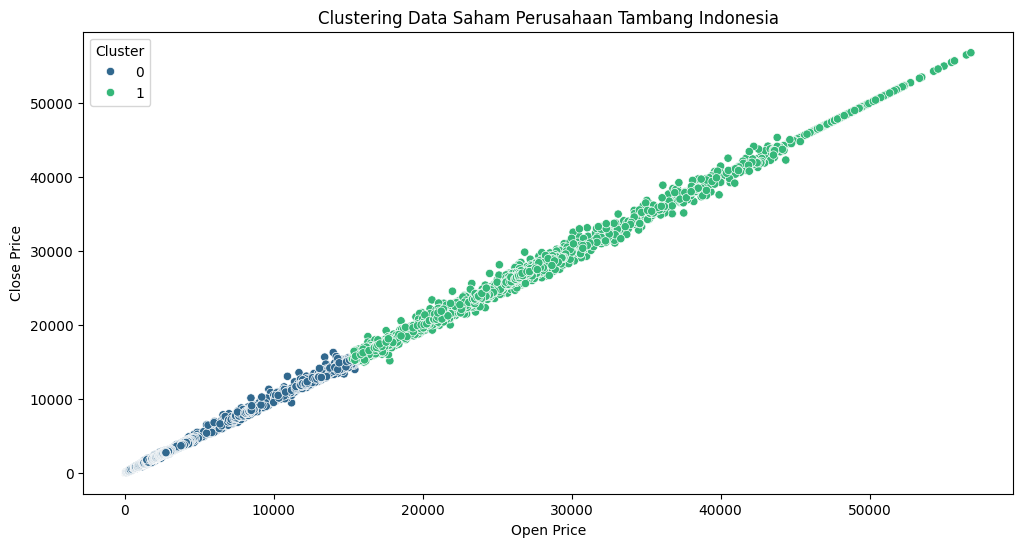

In [20]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stocks, x='Open', y='Close', hue='Cluster', palette='viridis')
plt.title("Clustering Data Saham Perusahaan Tambang Indonesia")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [22]:
# Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score : {silhouette:.4f}")

# Davies-Boudlin Score
davies_boudlin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Boudlin Score : {davies_boudlin:.4f}")

Silhouette Score : 0.8278
Davies-Boudlin Score : 0.3966


In [28]:
# Filter Kode Saham berdasarkan Cluster 0
cluster_0 = stocks[stocks['Cluster'] == 0]['Code'].unique()
print("Kode saham di cluster 0 : ")
print(cluster_0)

# Jumlah Saham di Cluster 0
count_cluster_0 = stocks[stocks['Cluster'] == 0]['Code'].nunique()
print(f"Jumlah Saham : {count_cluster_0}")

print("============================================")

# Filter Kode Saham berdasarkan Cluster 1
cluster_1 = stocks[stocks['Cluster'] == 1]['Code'].unique()
print("Kode saham di cluster 1 : ")
print(cluster_1)

# Jumlah saham di cluster 0
count_cluster_1 = stocks[stocks['Cluster'] == 1]['Code'].nunique()
print(f"Jumlah Saham : {count_cluster_1}")

Kode saham di cluster 0 : 
['ADRO' 'BUMI' 'BYAN' 'GEMS' 'INDY' 'ITMG' 'PTBA']
Jumlah Saham : 7
Kode saham di cluster 1 : 
['BYAN' 'GEMS' 'ITMG']
Jumlah Saham : 3


In [79]:
# Jumlah Data untuk Cluster 0
cluster_0_data_km = stocks[stocks['Cluster'] == 0]['Code']
cluster_0_data_km.info()

<class 'pandas.core.series.Series'>
Index: 23585 entries, 0 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
23585 non-null  object
dtypes: object(1)
memory usage: 368.5+ KB


In [80]:
# Jumlah Data untuk Cluster 1
cluster_1_km = stocks[stocks['Cluster'] == 1]['Code']
cluster_1_km.info()

<class 'pandas.core.series.Series'>
Index: 3327 entries, 3540 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
3327 non-null   object
dtypes: object(1)
memory usage: 52.0+ KB


In [78]:
# rata-rata setiap fitur dari model Kmeans
stocks_summary_kmeans = stocks.groupby('Cluster')[['Open', 'High', 'Low', 'Close', 'Volume']].mean()
stocks_summary_kmeans

,Open,High,Low,Close,Volume
Cluster,,,,,
0,2288.079457,2324.741700,2251.480793,2286.713123,8.897577e+07
1,28385.054103,28778.080854,27982.183649,28373.549745,1.767541e+06


# Model Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
# feature selection
features_hc = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stocks[features_hc]

In [34]:
# Normalisasi Data
scaler_hc = StandardScaler()
X_scaled = scaler.fit_transform(X)

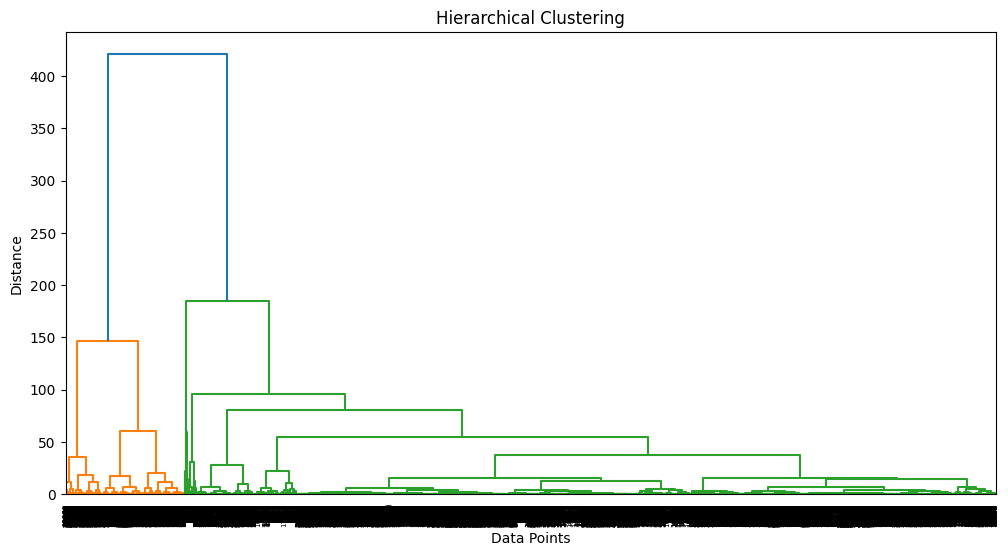

In [35]:
# Linkeage
linked = linkage(X_scaled, method="ward")

# Dendogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [42]:
# model hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = hierarchical.fit_predict(X_scaled)

# tambah hasil cluster ke data
stocks['Cluster_hc'] = clusters
stocks

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_5020\3370982825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['Cluster_hc'] = clusters


,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster,Cluster_hc
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0,0
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0,0
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0,0
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0,0
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0,0
...,...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0,0
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0,0
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0,0
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0,0


In [43]:
# evaluasi model
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score : {silhouette:.4f}")

davis_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Score : {davis_bouldin:.4f}")

Silhouette Score : 0.8273
Davies-Bouldin Score : 0.4038


In [56]:
# Kode dan saham cluster 0
cluster_0_hc = stocks[stocks['Cluster_hc'] == 0]['Code'].unique()
print("Kode saham cluster 0 : ", cluster_0_hc)
jumlah_cluster_0_hc = stocks[stocks['Cluster_hc'] == 0]['Code'].nunique()
print("Jumlah Saham : ", jumlah_cluster_0_hc)

# Kode dan saham cluster 1
cluster_1_hc = stocks[stocks['Cluster_hc'] == 1]['Code'].unique()
jumlah_cluster_1_hc = stocks[stocks['Cluster_hc'] == 1]['Code'].nunique()
print("Kode Saham Cluster 1 : ", cluster_1_hc)
print("Jumlah Saham : ", jumlah_cluster_1_hc)

Kode saham cluster 0 :  ['ADRO' 'BUMI' 'BYAN' 'GEMS' 'INDY' 'ITMG' 'PTBA']
Jumlah Saham :  7
Kode Saham Cluster 1 :  ['BYAN' 'GEMS' 'ITMG']
Jumlah Saham :  3


In [68]:
# Jumlah Data untuk Cluster 0
cluster_0_data = stocks[stocks['Cluster_hc'] == 0]['Code']
cluster_0_data.info()

<class 'pandas.core.series.Series'>
Index: 23464 entries, 0 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
23464 non-null  object
dtypes: object(1)
memory usage: 366.6+ KB


In [65]:
# Jumlah Data untuk Cluster 1
cluster_1_data = stocks[stocks['Cluster_hc'] == 1]['Code']
cluster_1_data.info()

<class 'pandas.core.series.Series'>
Index: 3448 entries, 3529 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
3448 non-null   object
dtypes: object(1)
memory usage: 53.9+ KB


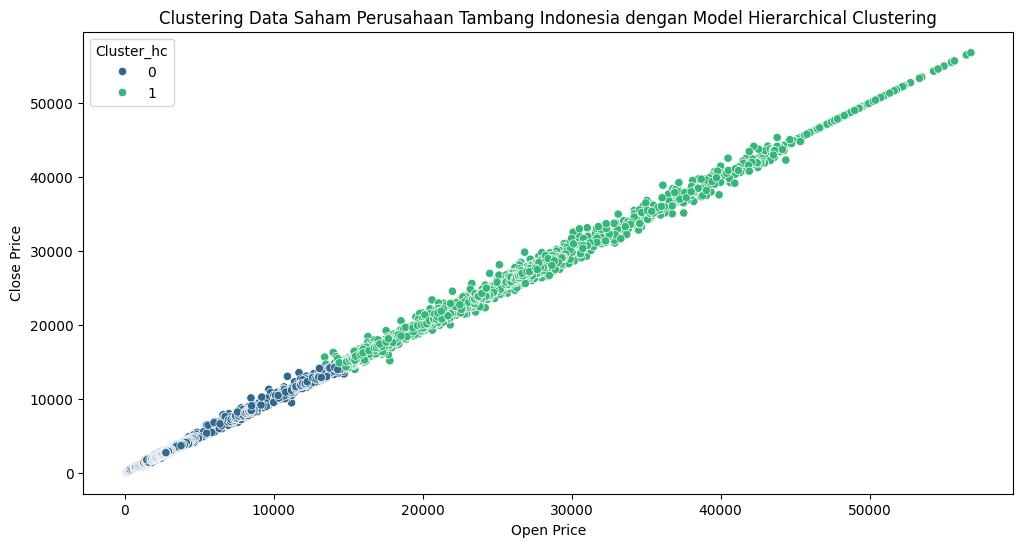

In [69]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stocks, x='Open', y='Close', hue='Cluster_hc', palette='viridis')
plt.title("Clustering Data Saham Perusahaan Tambang Indonesia dengan Model Hierarchical Clustering")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [75]:
# rata-rata setiap fitur dari model HC
cluster_summary_hc = stocks.groupby('Cluster_hc')[['Open', 'High', 'Low', 'Close', 'Volume']].mean()
cluster_summary_hc

,Open,High,Low,Close,Volume
Cluster_hc,,,,,
0,2222.960876,2257.944426,2187.670453,2221.374403,8.941916e+07
1,27912.376740,28304.321346,27513.457077,27902.726218,1.810591e+06


# Optimasi Model K-Means dan Hierarchical Clustering